# **Import Libraries**

In [ ]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,  Dropout

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

## **Building Dataset**

#### Obtaining from Spectogram

**AlexNet**

In [52]:
## AlexNet Approach 1
train_labels_1_alexNet = np.load('./data/new_Data/train_labels.npy')
train_predictions_1_alexNet = np.load('./data/spectrogram_outputs/approach1/alexnet/train_predictions.npy')

test_labels_1_alexNet = np.load('./data/new_Data/test_labels.npy')
test_predictions_1_alexNet = np.load('./data/spectrogram_outputs/approach1/alexnet/test_predictions.npy')

## AlexNet Approach 2
train_labels_2_alexNet = np.load('./data/new_Data/train_labels.npy')
train_predictions_2_alexNet = np.load('./data/spectrogram_outputs/approach2/alexnet/train_predictions.npy')

test_labels_2_alexNet = np.load('./data/new_Data/test_labels.npy')
test_predictions_2_alexNet = np.load('./data/spectrogram_outputs/approach2/alexnet/test_predictions.npy')

## AlexNet Approach 3
train_labels_3_alexNet = np.load('./data/new_Data/train_labels.npy')
train_predictions_3_alexNet = np.load('./data/spectrogram_outputs/approach3/alexnet/train_predictions.npy')

test_labels_3_alexNet = np.load('./data/new_Data/test_labels.npy')
test_predictions_3_alexNet = np.load('./data/spectrogram_outputs/approach3/alexnet/test_predictions.npy')


**DenseNet**

In [53]:
## DenseNet Approach 1
train_labels_1_DenseNet = np.load('./data/new_Data/train_labels.npy')
train_predictions_1_DenseNet = np.load('./data/spectrogram_outputs/approach1/densenet/train_predictions.npy')

test_labels_1_DenseNet = np.load('./data/new_Data/test_labels.npy')
test_predictions_1_DenseNet = np.load('./data/spectrogram_outputs/approach1/densenet/test_predictions.npy')

## DenseNet Approach 2
train_labels_2_DenseNet = np.load('./data/new_Data/train_labels.npy')
train_predictions_2_DenseNet = np.load('./data/spectrogram_outputs/approach2/densenet/train_predictions.npy')

test_labels_2_DenseNet = np.load('./data/new_Data/test_labels.npy')
test_predictions_2_DenseNet = np.load('./data/spectrogram_outputs/approach2/densenet/test_predictions.npy')

## DenseNet Approach 3
train_labels_3_DenseNet = np.load('./data/new_Data/train_labels.npy')
train_predictions_3_DenseNet = np.load('./data/spectrogram_outputs/approach3/densenet/train_predictions.npy')

test_labels_3_DenseNet = np.load('./data/new_Data/test_labels.npy')
test_predictions_3_DenseNet = np.load('./data/spectrogram_outputs/approach3/densenet/test_predictions.npy')

**EffecientNet**

In [54]:
## Effecient Approach 1
train_labels_1_EffencientNet = np.load('./data/new_Data/train_labels.npy')
train_predictions_1_EffencientNet= np.load('./data/spectrogram_outputs/approach1/efficientnet/train_predictions.npy')

test_labels_1_EffencientNet= np.load('./data/new_Data/test_labels.npy')
test_predictions_1_EffencientNet= np.load('./data/spectrogram_outputs/approach1/efficientnet/test_predictions.npy')

## Effecient Approach 2
train_labels_2_EffencientNet = np.load('./data/new_Data/train_labels.npy')
train_predictions_2_EffencientNet = np.load('./data/spectrogram_outputs/approach2/efficientnet/train_predictions.npy')

test_labels_2_EffencientNet = np.load('./data/new_Data/test_labels.npy')
test_predictions_2_EffencientNet= np.load('./data/spectrogram_outputs/approach2/efficientnet/test_predictions.npy')

## Effecient Approach 3
train_labels_3_EffencientNet = np.load('./data/new_Data/train_labels.npy')
train_predictions_3_EffencientNet = np.load('./data/spectrogram_outputs/approach3/efficientnet/train_predictions.npy')

test_labels_3_EffencientNet = np.load('./data/new_Data/test_labels.npy')
test_predictions_3_EffencientNet = np.load('./data/spectrogram_outputs/approach3/efficientnet/test_predictions.npy')

**ResNet**

In [55]:
## ResNet Approach 1
train_labels_1_ResNet = np.load('./data/new_Data/train_labels.npy')
train_predictions_1_ResNet= np.load('./data/spectrogram_outputs/approach1/resnet/train_predictions.npy')

test_labels_1_ResNet= np.load('./data/new_Data/test_labels.npy')
test_predictions_1_ResNet= np.load('./data/spectrogram_outputs/approach1/resnet/test_predictions.npy')

## Resnet Approach 2
train_labels_2_ResNet = np.load('./data/new_Data/train_labels.npy')
train_predictions_2_ResNet = np.load('./data/spectrogram_outputs/approach2/resnet/train_predictions.npy')

test_labels_2_ResNet = np.load('./data/new_Data/test_labels.npy')
test_predictions_2_ResNet= np.load('./data/spectrogram_outputs/approach2/resnet/test_predictions.npy')

## ResNet Approach 3
train_labels_3_ResNet = np.load('./data/new_Data/train_labels.npy')
train_predictions_3_ResNet = np.load('./data/spectrogram_outputs/approach3/resnet/train_predictions.npy')

test_labels_3_ResNet = np.load('./data/new_Data/test_labels.npy')
test_predictions_3_ResNet = np.load('./data/spectrogram_outputs/approach3/resnet/test_predictions.npy')

### Adding the dates of the prediction

In [56]:
with open('./data/new_Data/date_mapping.json') as f:
    data_json = json.load(f)
    print(data_json)

{'1': '2017-10-12', '2': '2017-10-13', '3': '2017-10-16', '4': '2017-10-17', '5': '2017-10-18', '6': '2017-10-19', '7': '2017-10-23', '8': '2017-10-24', '9': '2017-10-25', '10': '2017-10-26', '11': '2017-10-27', '12': '2017-10-30', '13': '2017-10-31', '14': '2017-11-01', '15': '2017-11-02', '16': '2017-11-03', '17': '2017-11-06', '18': '2017-11-07', '19': '2017-11-08', '20': '2017-11-09', '21': '2017-11-10', '22': '2017-11-13', '23': '2017-11-14', '24': '2017-11-15', '25': '2017-11-16', '26': '2017-11-17', '27': '2017-11-20', '28': '2017-11-21', '29': '2017-11-22', '30': '2017-11-23', '31': '2017-11-24', '32': '2017-11-27', '33': '2017-11-28', '34': '2017-11-29', '35': '2017-11-30', '36': '2017-12-01', '37': '2017-12-04', '38': '2017-12-05', '39': '2017-12-06', '40': '2017-12-07', '41': '2017-12-08', '42': '2017-12-11', '43': '2017-12-12', '44': '2017-12-13', '45': '2017-12-14', '46': '2017-12-15', '47': '2017-12-18', '48': '2017-12-19', '49': '2017-12-20', '50': '2017-12-21', '51': '2

Convert the data_json dictionary to a DataFrame

In [57]:
date_mapping_df = pd.DataFrame(list(data_json.items()), columns=['Index', 'Date'])

# AlexNet Approach 1
train_date_mapping_df_alexnet_1 = date_mapping_df.iloc[:1032]
train_date_mapping_df_alexnet_1['Train Labels'] = train_labels_1_alexNet 
train_date_mapping_df_alexnet_1['Predictions_CNN'] = train_predictions_1_alexNet
train_date_mapping_df_alexnet_1

# AlexNet Approach 2
train_date_mapping_df_alexnet_2 = date_mapping_df.iloc[:1032]
train_date_mapping_df_alexnet_2['Train Labels'] = train_labels_2_alexNet 
train_date_mapping_df_alexnet_2['Predictions_CNN'] = train_predictions_2_alexNet
train_date_mapping_df_alexnet_2

# AlexNet Approach 3
train_date_mapping_df_alexnet_3 = date_mapping_df.iloc[:1032]
train_date_mapping_df_alexnet_3['Train Labels'] = train_labels_3_alexNet 
train_date_mapping_df_alexnet_3['Predictions_CNN'] = train_predictions_3_alexNet
train_date_mapping_df_alexnet_3

# DenseNet Approach 1
train_date_mapping_df_densenet_1 = date_mapping_df.iloc[:1032]
train_date_mapping_df_densenet_1['Train Labels'] = train_labels_1_DenseNet
train_date_mapping_df_densenet_1['Predictions_CNN'] = train_predictions_1_DenseNet
train_date_mapping_df_densenet_1

# DenseNet Approach 2
train_date_mapping_df_densenet_2 = date_mapping_df.iloc[:1032]
train_date_mapping_df_densenet_2['Train Labels'] = train_labels_2_DenseNet
train_date_mapping_df_densenet_2['Predictions_CNN'] = train_predictions_2_DenseNet
train_date_mapping_df_densenet_2

# DenseNet Approach 3
train_date_mapping_df_densenet_3 = date_mapping_df.iloc[:1032]
train_date_mapping_df_densenet_3['Train Labels'] = train_labels_3_DenseNet
train_date_mapping_df_densenet_3['Predictions_CNN'] = train_predictions_3_DenseNet
train_date_mapping_df_densenet_3

# EffecientNet Approach 1
train_date_mapping_df_effencientnet_1 = date_mapping_df.iloc[:1032]
train_date_mapping_df_effencientnet_1['Train Labels'] = train_labels_1_EffencientNet
train_date_mapping_df_effencientnet_1['Predictions_CNN'] = train_predictions_1_EffencientNet
train_date_mapping_df_effencientnet_1

# EffecientNet Approach 2
train_date_mapping_df_effencientnet_2 = date_mapping_df.iloc[:1032]
train_date_mapping_df_effencientnet_2['Train Labels'] = train_labels_2_EffencientNet
train_date_mapping_df_effencientnet_2['Predictions_CNN'] = train_predictions_2_EffencientNet
train_date_mapping_df_effencientnet_2

# EffecientNet Approach 3
train_date_mapping_df_effencientnet_3 = date_mapping_df.iloc[:1032]
train_date_mapping_df_effencientnet_3['Train Labels'] = train_labels_3_EffencientNet
train_date_mapping_df_effencientnet_3['Predictions_CNN'] = train_predictions_3_EffencientNet
train_date_mapping_df_effencientnet_3

# ResNet Approach 1
train_date_mapping_df_resnet_1 = date_mapping_df.iloc[:1032]
train_date_mapping_df_resnet_1['Train Labels'] = train_labels_1_ResNet
train_date_mapping_df_resnet_1['Predictions_CNN'] = train_predictions_1_ResNet
train_date_mapping_df_resnet_1

# ResNet Approach 2
train_date_mapping_df_resnet_2 = date_mapping_df.iloc[:1032]
train_date_mapping_df_resnet_2['Train Labels'] = train_labels_2_ResNet
train_date_mapping_df_resnet_2['Predictions_CNN'] = train_predictions_2_ResNet
train_date_mapping_df_resnet_2

# ResNet Approach 3
train_date_mapping_df_resnet_3 = date_mapping_df.iloc[:1032]
train_date_mapping_df_resnet_3['Train Labels'] = train_labels_3_ResNet
train_date_mapping_df_resnet_3['Predictions_CNN'] = train_predictions_3_ResNet
train_date_mapping_df_resnet_3


C:\Users\manav\AppData\Local\Temp\ipykernel_21672\455871524.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_date_mapping_df_alexnet_1['Train Labels'] = train_labels_1_alexNet
C:\Users\manav\AppData\Local\Temp\ipykernel_21672\455871524.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_date_mapping_df_alexnet_1['Predictions_CNN'] = train_predictions_1_alexNet
C:\Users\manav\AppData\Local\Temp\ipykernel_21672\455871524.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,Index,Date,Train Labels,Predictions_CNN
0,1,2017-10-12,0.50,0.488770
1,2,2017-10-13,0.52,0.492188
2,3,2017-10-16,0.59,0.492188
3,4,2017-10-17,0.49,0.488525
4,5,2017-10-18,0.46,0.490234
...,...,...,...,...
1027,1028,2021-12-10,0.48,0.528809
1028,1029,2021-12-13,0.50,0.528809
1029,1030,2021-12-14,0.54,0.530762
1030,1031,2021-12-15,0.46,0.530762


#### Obtaining from the Stock Features

In [58]:
train_data_sentiment = pd.read_csv('./data/new_Data/train_data_sentiment.csv')
train_data_sentiment.rename(columns={'Predicted': 'Predicted_News'}, inplace=True)
train_data_sentiment

,Date,Predicted_News,Actual
0,2018-01-01,0.511234,0.49
1,2018-01-02,0.486145,0.50
2,2018-01-03,0.496470,0.53
3,2018-01-04,0.534574,0.52
4,2018-01-05,0.497034,0.60
...,...,...,...
457,2019-11-27,0.512481,0.59
458,2019-11-28,0.471442,0.45
459,2019-11-29,0.514286,0.56
460,2019-12-02,0.491709,0.54


Combine Spectogram Dataframes and Sentiment on 'Date'

In [59]:
# AlexNet Approach 1
combined_df_train_alexNet_1 = pd.merge(train_date_mapping_df_alexnet_1, train_data_sentiment, on='Date', how='inner')
combined_df_train_alexNet_1.drop(columns=['Train Labels'], inplace=True)
combined_df_train_alexNet_1

# AlexNet Approach 2
combined_df_train_alexNet_2 = pd.merge(train_date_mapping_df_alexnet_2, train_data_sentiment, on='Date', how='inner')
combined_df_train_alexNet_2.drop(columns=['Train Labels'], inplace=True)
combined_df_train_alexNet_2

# AlexNet Approach 3
combined_df_train_alexNet_3 = pd.merge(train_date_mapping_df_alexnet_3, train_data_sentiment, on='Date', how='inner')
combined_df_train_alexNet_3.drop(columns=['Train Labels'], inplace=True)
combined_df_train_alexNet_3

# DenseNet Approach 1
combined_df_train_DenseNet_1 = pd.merge(train_date_mapping_df_densenet_1, train_data_sentiment, on='Date', how='inner')
combined_df_train_DenseNet_1.drop(columns=['Train Labels'], inplace=True)
combined_df_train_DenseNet_1

# DenseNet Approach 2
combined_df_train_DenseNet_2 = pd.merge(train_date_mapping_df_densenet_2, train_data_sentiment, on='Date', how='inner')
combined_df_train_DenseNet_2.drop(columns=['Train Labels'], inplace=True)
combined_df_train_DenseNet_2

# DenseNet Approach 3
combined_df_train_DenseNet_3 = pd.merge(train_date_mapping_df_densenet_3, train_data_sentiment, on='Date', how='inner')
combined_df_train_DenseNet_3.drop(columns=['Train Labels'], inplace=True)
combined_df_train_DenseNet_3

# EffecientNet Approach 1
combined_df_train_EffencientNet_1 = pd.merge(train_date_mapping_df_effencientnet_1, train_data_sentiment, on='Date', how='inner')
combined_df_train_EffencientNet_1.drop(columns=['Train Labels'], inplace=True)
combined_df_train_EffencientNet_1

# EffecientNet Approach 2
combined_df_train_EffencientNet_2 = pd.merge(train_date_mapping_df_effencientnet_2, train_data_sentiment, on='Date', how='inner')
combined_df_train_EffencientNet_2.drop(columns=['Train Labels'], inplace=True)
combined_df_train_EffencientNet_2

# EffecientNet Approach 3
combined_df_train_EffencientNet_3 = pd.merge(train_date_mapping_df_effencientnet_3, train_data_sentiment, on='Date', how='inner')
combined_df_train_EffencientNet_3.drop(columns=['Train Labels'], inplace=True)
combined_df_train_EffencientNet_3

# ResNet Approach 1
combined_df_train_ResNet_1 = pd.merge(train_date_mapping_df_resnet_1, train_data_sentiment, on='Date', how='inner')
combined_df_train_ResNet_1.drop(columns=['Train Labels'], inplace=True)
combined_df_train_ResNet_1

# ResNet Approach 2
combined_df_train_ResNet_2 = pd.merge(train_date_mapping_df_resnet_2, train_data_sentiment, on='Date', how='inner')
combined_df_train_ResNet_2.drop(columns=['Train Labels'], inplace=True)
combined_df_train_ResNet_2

# ResNet Approach 3
combined_df_train_ResNet_3 = pd.merge(train_date_mapping_df_resnet_3, train_data_sentiment, on='Date', how='inner')
combined_df_train_ResNet_3.drop(columns=['Train Labels'], inplace=True)
combined_df_train_ResNet_3


c:\Users\manav\OneDrive\Desktop\NIT Surathkal\Semester 7\IT-457\Project\Stock-Trend-Prediction\.venv\lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Index,Date,Predictions_CNN,Predicted_News,Actual
0,56,2018-01-01,0.504883,0.511234,0.49
1,57,2018-01-02,0.513184,0.486145,0.50
2,58,2018-01-03,0.513184,0.496470,0.53
3,59,2018-01-04,0.516113,0.534574,0.52
4,60,2018-01-05,0.515137,0.497034,0.60
...,...,...,...,...,...
457,521,2019-11-27,0.568848,0.512481,0.59
458,522,2019-11-28,0.567383,0.471442,0.45
459,523,2019-11-29,0.566406,0.514286,0.56
460,524,2019-12-02,0.565918,0.491709,0.54


Combine Test Spectogram Dataframes and Test Sentiment on 'Date'

In [60]:
test_data = pd.read_csv('./data/new_Data/test_data_sentiment.csv')
test_data 

# AlexNet Approach 1
combined_df_test_alexNet_1 = pd.merge(train_date_mapping_df_alexnet_1, test_data, on='Date', how='inner')
combined_df_test_alexNet_1.drop(columns=['Train Labels'], inplace=True)
combined_df_test_alexNet_1

# AlexNet Approach 2
combined_df_test_alexNet_2 = pd.merge(train_date_mapping_df_alexnet_2, test_data, on='Date', how='inner')
combined_df_test_alexNet_2.drop(columns=['Train Labels'], inplace=True)
combined_df_test_alexNet_2

# AlexNet Approach 3
combined_df_test_alexNet_3 = pd.merge(train_date_mapping_df_alexnet_3, test_data, on='Date', how='inner')
combined_df_test_alexNet_3.drop(columns=['Train Labels'], inplace=True)
combined_df_test_alexNet_3

# DenseNet Approach 1
combined_df_test_DenseNet_1 = pd.merge(train_date_mapping_df_densenet_1, test_data, on='Date', how='inner')
combined_df_test_DenseNet_1.drop(columns=['Train Labels'], inplace=True)
combined_df_test_DenseNet_1

# DenseNet Approach 2
combined_df_test_DenseNet_2 = pd.merge(train_date_mapping_df_densenet_2, test_data, on='Date', how='inner')
combined_df_test_DenseNet_2.drop(columns=['Train Labels'], inplace=True)
combined_df_test_DenseNet_2

# DenseNet Approach 3
combined_df_test_DenseNet_3 = pd.merge(train_date_mapping_df_densenet_3, test_data, on='Date', how='inner')
combined_df_test_DenseNet_3.drop(columns=['Train Labels'], inplace=True)
combined_df_test_DenseNet_3

# EffecientNet Approach 1
combined_df_test_EffencientNet_1 = pd.merge(train_date_mapping_df_effencientnet_1, test_data, on='Date', how='inner')
combined_df_test_EffencientNet_1.drop(columns=['Train Labels'], inplace=True)
combined_df_test_EffencientNet_1

# EffecientNet Approach 2
combined_df_test_EffencientNet_2 = pd.merge(train_date_mapping_df_effencientnet_2, test_data, on='Date', how='inner')
combined_df_test_EffencientNet_2.drop(columns=['Train Labels'], inplace=True)
combined_df_test_EffencientNet_2

# EffecientNet Approach 3
combined_df_test_EffencientNet_3 = pd.merge(train_date_mapping_df_effencientnet_3, test_data, on='Date', how='inner')
combined_df_test_EffencientNet_3.drop(columns=['Train Labels'], inplace=True)
combined_df_test_EffencientNet_3

# ResNet Approach 1
combined_df_test_ResNet_1 = pd.merge(train_date_mapping_df_resnet_1, test_data, on='Date', how='inner')
combined_df_test_ResNet_1.drop(columns=['Train Labels'], inplace=True)
combined_df_test_ResNet_1

# ResNet Approach 2
combined_df_test_ResNet_2 = pd.merge(train_date_mapping_df_resnet_2, test_data, on='Date', how='inner')
combined_df_test_ResNet_2.drop(columns=['Train Labels'], inplace=True)
combined_df_test_ResNet_2

# ResNet Approach 3
combined_df_test_ResNet_3 = pd.merge(train_date_mapping_df_resnet_3, test_data, on='Date', how='inner')
combined_df_test_ResNet_3.drop(columns=['Train Labels'], inplace=True)
combined_df_test_ResNet_3

c:\Users\manav\OneDrive\Desktop\NIT Surathkal\Semester 7\IT-457\Project\Stock-Trend-Prediction\.venv\lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Index,Date,Predictions_CNN,Predicted,Actual
0,526,2019-12-04,0.564453,0.449254,0.51
1,527,2019-12-05,0.565430,0.477275,0.49
2,528,2019-12-06,0.565430,0.506847,0.50
3,529,2019-12-09,0.541504,0.511288,0.50
4,530,2019-12-10,0.542480,0.538294,0.47
...,...,...,...,...,...
111,637,2020-05-19,0.476074,0.502187,0.47
112,638,2020-05-20,0.476074,0.529795,0.57
113,639,2020-05-21,0.477051,0.561344,0.58
114,640,2020-05-22,0.477295,0.523875,0.44


## **Training Model**

### Model

In [61]:
def model(X_train, y_train, X_test, y_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3), 
    Dense(32, activation='relu'),
    Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

    loss = model.evaluate(X_test_scaled, y_test)
    print(f'Test Loss: {loss}')

    predictions = model.predict(X_test_scaled)
    return predictions

### Plot

In [62]:
def plot(results_df):
    plt.figure(figsize=(10, 6))
    plt.plot(results_df['Date'], results_df['Actual'], label='Actual', color='blue')
    plt.plot(results_df['Date'],  results_df['Predicted'], label='Predicted', color='red')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Actual vs Predicted Values')
    plt.legend()
    plt.tight_layout()
    plt.show()

##  Predictions for AlexNet

Approach 1

In [ ]:
X_train_alexNet_1 = combined_df_train_alexNet_1[['Predictions_CNN', 'Predicted_News']].values
y_train_alexNet_1 = combined_df_train_alexNet_1['Actual'].values

X_test_alexNet_1  = combined_df_test_alexNet_1[['Predictions_CNN', 'Predicted']].values
y_test_alexNet_1  = combined_df_test_alexNet_1['Actual'].values

predictions_alexNet_1 = model(X_train_alexNet_1 , y_train_alexNet_1 , X_test_alexNet_1 , y_test_alexNet_1 )

Approach 2

In [ ]:
X_train_alexNet_2 = combined_df_train_alexNet_2[['Predictions_CNN', 'Predicted_News']].values
y_train_alexNet_2 = combined_df_train_alexNet_2['Actual'].values

X_test_alexNet_2  = combined_df_test_alexNet_2[['Predictions_CNN', 'Predicted']].values
y_test_alexNet_2  = combined_df_test_alexNet_2['Actual'].values

predictions_alexNet_2 = model(X_train_alexNet_2 , y_train_alexNet_2 , X_test_alexNet_2 , y_test_alexNet_2 )


Approach 3

In [ ]:
X_train_alexNet_3 = combined_df_train_alexNet_3[['Predictions_CNN', 'Predicted_News']].values
y_train_alexNet_3 = combined_df_train_alexNet_3['Actual'].values

X_test_alexNet_3  = combined_df_test_alexNet_3[['Predictions_CNN', 'Predicted']].values
y_test_alexNet_3  = combined_df_test_alexNet_3['Actual'].values

predictions_alexNet_3 = model(X_train_alexNet_3 , y_train_alexNet_3 , X_test_alexNet_3 , y_test_alexNet_3 )

##  Predictions for DenseNet

Approach 1

In [ ]:
X_train_DenseNet_1 = combined_df_train_DenseNet_1[['Predictions_CNN', 'Predicted_News']].values
y_train_DenseNet_1 = combined_df_train_DenseNet_1['Actual'].values

X_test_DenseNet_1  = combined_df_test_DenseNet_1[['Predictions_CNN', 'Predicted']].values
y_test_DenseNet_1  = combined_df_test_DenseNet_1['Actual'].values

predictions_DenseNet_1 = model(X_train_DenseNet_1 , y_train_DenseNet_1 , X_test_DenseNet_1 , y_test_DenseNet_1 )


Approach 2

In [ ]:

X_train_DenseNet_2 = combined_df_train_DenseNet_2[['Predictions_CNN', 'Predicted_News']].values
y_train_DenseNet_2 = combined_df_train_DenseNet_2['Actual'].values

X_test_DenseNet_2  = combined_df_test_DenseNet_2[['Predictions_CNN', 'Predicted']].values
y_test_DenseNet_2  = combined_df_test_DenseNet_2['Actual'].values

predictions_DenseNet_2 = model(X_train_DenseNet_2 , y_train_DenseNet_2 , X_test_DenseNet_2 , y_test_DenseNet_2 )


Approach 3

In [ ]:
X_train_DenseNet_3 = combined_df_train_DenseNet_3[['Predictions_CNN', 'Predicted_News']].values
y_train_DenseNet_3 = combined_df_train_DenseNet_3['Actual'].values

X_test_DenseNet_3  = combined_df_test_DenseNet_3[['Predictions_CNN', 'Predicted']].values
y_test_DenseNet_3  = combined_df_test_DenseNet_3['Actual'].values

predictions_DenseNet_3 = model(X_train_DenseNet_3 , y_train_DenseNet_3 , X_test_DenseNet_3 , y_test_DenseNet_3 )


## Predictions for EffecientNet

Approach 1

In [ ]:

X_train_EffencientNet_1 = combined_df_train_EffencientNet_1[['Predictions_CNN', 'Predicted_News']].values
y_train_EffencientNet_1 = combined_df_train_EffencientNet_1['Actual'].values

X_test_EffencientNet_1  = combined_df_test_EffencientNet_1[['Predictions_CNN', 'Predicted']].values
y_test_EffencientNet_1  = combined_df_test_EffencientNet_1['Actual'].values

predictions_EffencientNet_1 = model(X_train_EffencientNet_1 , y_train_EffencientNet_1 , X_test_EffencientNet_1 , y_test_EffencientNet_1 )


Approach 2

In [ ]:
X_train_EffencientNet_2 = combined_df_train_EffencientNet_2[['Predictions_CNN', 'Predicted_News']].values
y_train_EffencientNet_2 = combined_df_train_EffencientNet_2['Actual'].values

X_test_EffencientNet_2  = combined_df_test_EffencientNet_2[['Predictions_CNN', 'Predicted']].values
y_test_EffencientNet_2  = combined_df_test_EffencientNet_2['Actual'].values

predictions_EffencientNet_2 = model(X_train_EffencientNet_2 , y_train_EffencientNet_2 , X_test_EffencientNet_2 , y_test_EffencientNet_2 )


Approach 3

In [ ]:
X_train_EffencientNet_3 = combined_df_train_EffencientNet_3[['Predictions_CNN', 'Predicted_News']].values
y_train_EffencientNet_3 = combined_df_train_EffencientNet_3['Actual'].values

X_test_EffencientNet_3  = combined_df_test_EffencientNet_3[['Predictions_CNN', 'Predicted']].values
y_test_EffencientNet_3  = combined_df_test_EffencientNet_3['Actual'].values

predictions_EffencientNet_3 = model(X_train_EffencientNet_3 , y_train_EffencientNet_3 , X_test_EffencientNet_3 , y_test_EffencientNet_3 )

## Predictions for ResNet

Approach 1

In [ ]:

X_train_ResNet_1 = combined_df_train_ResNet_1[['Predictions_CNN', 'Predicted_News']].values
y_train_ResNet_1 = combined_df_train_ResNet_1['Actual'].values

X_test_ResNet_1  = combined_df_test_ResNet_1[['Predictions_CNN', 'Predicted']].values
y_test_ResNet_1  = combined_df_test_ResNet_1['Actual'].values


predictions_ResNet_1 = model(X_train_ResNet_1 , y_train_ResNet_1 , X_test_ResNet_1 , y_test_ResNet_1 )


Approach 2

In [ ]:
X_train_ResNet_2 = combined_df_train_ResNet_2[['Predictions_CNN', 'Predicted_News']].values
y_train_ResNet_2 = combined_df_train_ResNet_2['Actual'].values

X_test_ResNet_2  = combined_df_test_ResNet_2[['Predictions_CNN', 'Predicted']].values
y_test_ResNet_2  = combined_df_test_ResNet_2['Actual'].values

predictions_ResNet_2 = model(X_train_ResNet_2 , y_train_ResNet_2 , X_test_ResNet_2 , y_test_ResNet_2 )


Approach 3

In [ ]:
X_train_ResNet_3 = combined_df_train_ResNet_3[['Predictions_CNN', 'Predicted_News']].values
y_train_ResNet_3 = combined_df_train_ResNet_3['Actual'].values

X_test_ResNet_3  = combined_df_test_ResNet_3[['Predictions_CNN', 'Predicted']].values
y_test_ResNet_3  = combined_df_test_ResNet_3['Actual'].values

predictions_ResNet_3 = model(X_train_ResNet_3 , y_train_ResNet_3 , X_test_ResNet_3 , y_test_ResNet_3 )

c:\Users\manav\OneDrive\Desktop\NIT Surathkal\Semester 7\IT-457\Project\Stock-Trend-Prediction\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3780 - val_loss: 0.1569
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1037 - val_loss: 0.0379
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0541 - val_loss: 0.0239
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0458 - val_loss: 0.0262
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0426 - val_loss: 0.0299
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0274 - val_loss: 0.0187
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0259 - val_loss: 0.0136
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0207 - val_loss: 0.0126
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0158 - val_loss: 0.0082
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - val_loss: 0.0082
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - val_loss: 0.0084
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0234 - va

c:\Users\manav\OneDrive\Desktop\NIT Surathkal\Semester 7\IT-457\Project\Stock-Trend-Prediction\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.2939 - val_loss: 0.0689
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0985 - val_loss: 0.0354
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0623 - val_loss: 0.0261
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0426 - val_loss: 0.0289
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0410 - val_loss: 0.0233
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0343 - val_loss: 0.0176
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0384 - val_loss: 0.0156
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0195 - val_loss: 0.0112
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0166 - val_loss: 0.0091
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0192 - val_loss: 0.0093
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0136 - val_loss: 0.0071
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0184 - val_loss: 

c:\Users\manav\OneDrive\Desktop\NIT Surathkal\Semester 7\IT-457\Project\Stock-Trend-Prediction\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.2808 - val_loss: 0.0735
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0813 - val_loss: 0.0304
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0755 - val_loss: 0.0280
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0396 - val_loss: 0.0278
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0372 - val_loss: 0.0222
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0332 - val_loss: 0.0136
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0312 - val_loss: 0.0129
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0258 - val_loss: 0.0083
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0189 - val_loss: 0.0065
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0182 - val_loss: 0.0047
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0135 - val_loss: 0.0040
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0180 - val_loss: 0.

c:\Users\manav\OneDrive\Desktop\NIT Surathkal\Semester 7\IT-457\Project\Stock-Trend-Prediction\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.1160 - val_loss: 0.0523
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0582 - val_loss: 0.0409
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0470 - val_loss: 0.0368
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0446 - val_loss: 0.0255
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0493 - val_loss: 0.0200
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0245 - val_loss: 0.0168
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0197 - val_loss: 0.0121
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0144 - val_loss: 0.0111
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0117 - val_loss: 0.0070
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0139 - val_loss: 0.0098
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0110 - val_loss: 0.0070
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0077 - val_los

c:\Users\manav\OneDrive\Desktop\NIT Surathkal\Semester 7\IT-457\Project\Stock-Trend-Prediction\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 176ms/step - loss: 0.2631 - val_loss: 0.0601
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0797 - val_loss: 0.0391
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0636 - val_loss: 0.0338
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 232ms/step - loss: 0.0537 - val_loss: 0.0249
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 272ms/step - loss: 0.0291 - val_loss: 0.0209
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 203ms/step - loss: 0.0278 - val_loss: 0.0171
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 255ms/step - loss: 0.0254 - val_loss: 0.0144
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 115ms/step - loss: 0.0218 - val_loss: 0.0127
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0225 - val_loss: 0.0111
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 135ms/step - loss: 0.0159 - val_loss: 0.0098
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 273ms/step - loss: 0.0180 - val_loss: 0.0080
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - 

c:\Users\manav\OneDrive\Desktop\NIT Surathkal\Semester 7\IT-457\Project\Stock-Trend-Prediction\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.1353 - val_loss: 0.0693
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0444 - val_loss: 0.0991
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0490 - val_loss: 0.0573
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0382 - val_loss: 0.0379
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0357 - val_loss: 0.0347
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0278 - val_loss: 0.0339
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0289 - val_loss: 0.0249
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0203 - val_loss: 0.0210
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0186 - val_loss: 0.0155
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0155 - val_loss: 0.0136
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0133 - val_loss: 0.0111
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0123 - val_lo

c:\Users\manav\OneDrive\Desktop\NIT Surathkal\Semester 7\IT-457\Project\Stock-Trend-Prediction\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0742 - val_loss: 0.0476
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0701 - val_loss: 0.0383
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0490 - val_loss: 0.0302
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0335 - val_loss: 0.0178
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0229 - val_loss: 0.0116
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - val_loss: 0.0090
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - val_loss: 0.0069
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - val_loss: 0.0060
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - val_loss: 0.0074
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - val_loss: 0.0059
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0074 - val_loss: 0.0060
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - val_loss: 0.0057

c:\Users\manav\OneDrive\Desktop\NIT Surathkal\Semester 7\IT-457\Project\Stock-Trend-Prediction\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2413 - val_loss: 0.0791
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1302 - val_loss: 0.0440
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0500 - val_loss: 0.0389
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0550 - val_loss: 0.0293
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0418 - val_loss: 0.0208
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0363 - val_loss: 0.0160
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0297 - val_loss: 0.0125
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0232 - val_loss: 0.0091
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0211 - val_loss: 0.0076
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0157 - val_loss: 0.0062
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - val_loss: 0.0053
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0106 - val_loss: 0.0047

c:\Users\manav\OneDrive\Desktop\NIT Surathkal\Semester 7\IT-457\Project\Stock-Trend-Prediction\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.2668 - val_loss: 0.0913
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1006 - val_loss: 0.0312
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0585 - val_loss: 0.0234
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0413 - val_loss: 0.0260
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0360 - val_loss: 0.0186
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0271 - val_loss: 0.0111
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0217 - val_loss: 0.0106
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0182 - val_loss: 0.0089
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0188 - val_loss: 0.0073
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0158 - val_loss: 0.0074
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0154 - val_loss: 0.0061
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0125 - val_loss: 0.004

c:\Users\manav\OneDrive\Desktop\NIT Surathkal\Semester 7\IT-457\Project\Stock-Trend-Prediction\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.4150 - val_loss: 0.1827
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1526 - val_loss: 0.0752
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0844 - val_loss: 0.0448
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0800 - val_loss: 0.0349
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0394 - val_loss: 0.0258
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0331 - val_loss: 0.0186
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0358 - val_loss: 0.0122
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0330 - val_loss: 0.0082
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0255 - val_loss: 0.0070
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0269 - val_loss: 0.0063
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0164 - val_loss: 0.0062
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0182 - val_loss: 0.00

c:\Users\manav\OneDrive\Desktop\NIT Surathkal\Semester 7\IT-457\Project\Stock-Trend-Prediction\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2346 - val_loss: 0.0966
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1181 - val_loss: 0.0516
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0981 - val_loss: 0.0404
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0531 - val_loss: 0.0270
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0494 - val_loss: 0.0201
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0510 - val_loss: 0.0176
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0251 - val_loss: 0.0097
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0273 - val_loss: 0.0062
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0219 - val_loss: 0.0055
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0179 - val_loss: 0.0053
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0216 - val_loss: 0.0056
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0169 - val_loss: 0.005

c:\Users\manav\OneDrive\Desktop\NIT Surathkal\Semester 7\IT-457\Project\Stock-Trend-Prediction\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.1868 - val_loss: 0.1219
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0657 - val_loss: 0.1450
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0614 - val_loss: 0.0727
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0422 - val_loss: 0.0418
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0318 - val_loss: 0.0561
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0263 - val_loss: 0.0463
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0240 - val_loss: 0.0249
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0180 - val_loss: 0.0250
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0145 - val_loss: 0.0121
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0147 - val_loss: 0.0139
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0188 - val_loss: 0.0078
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0090 -

## **Results**

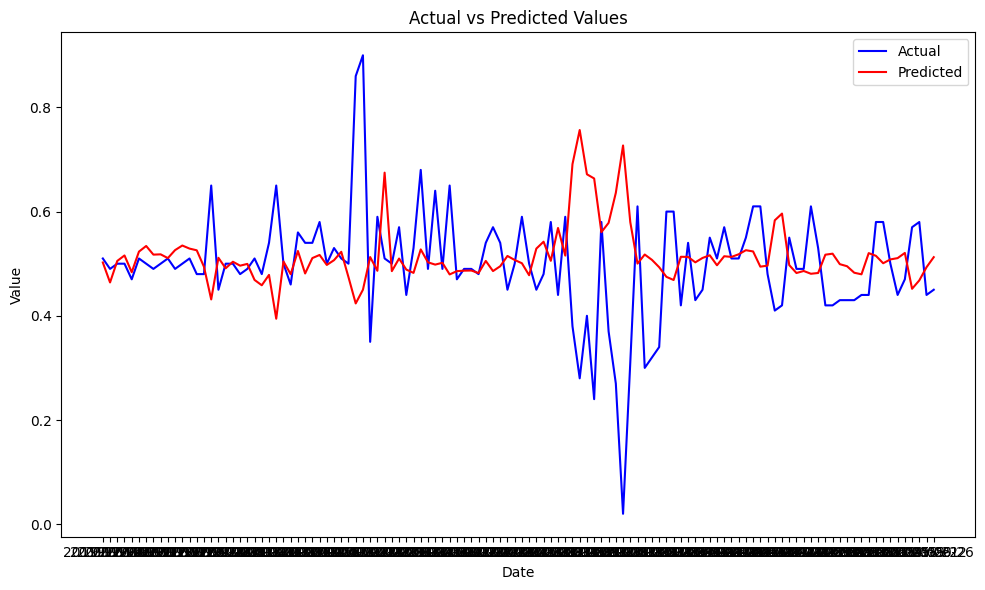

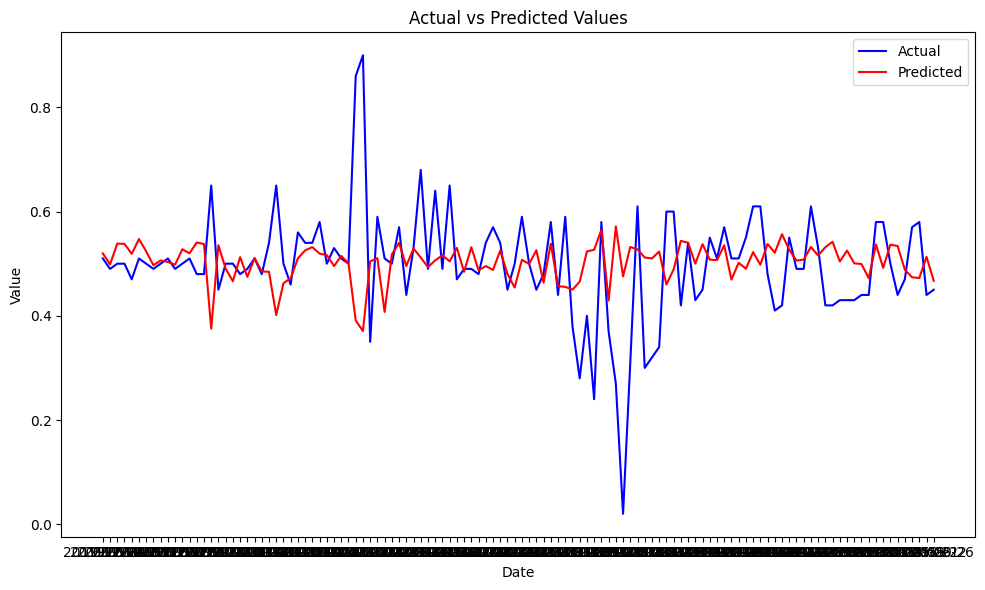

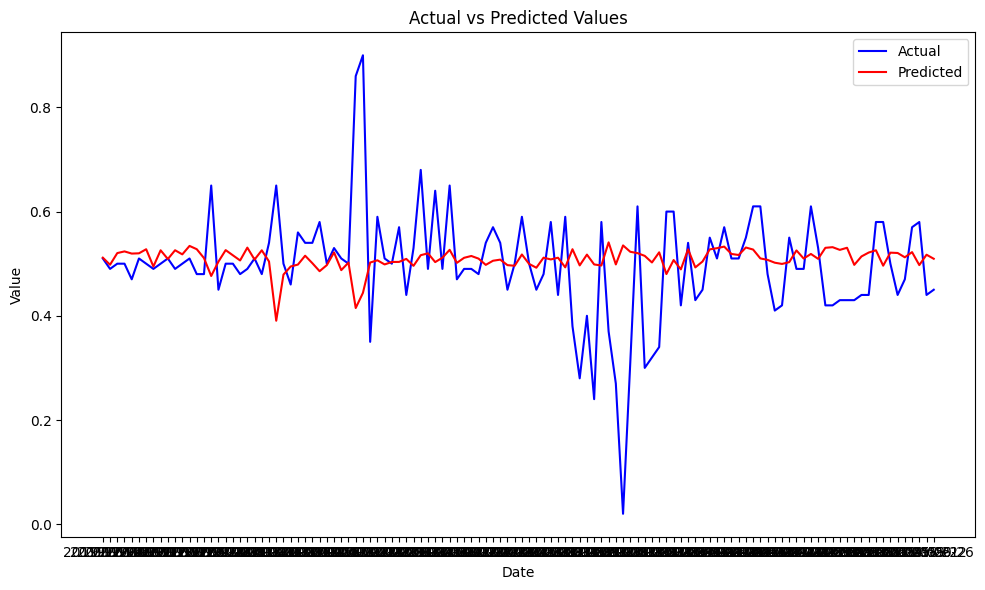

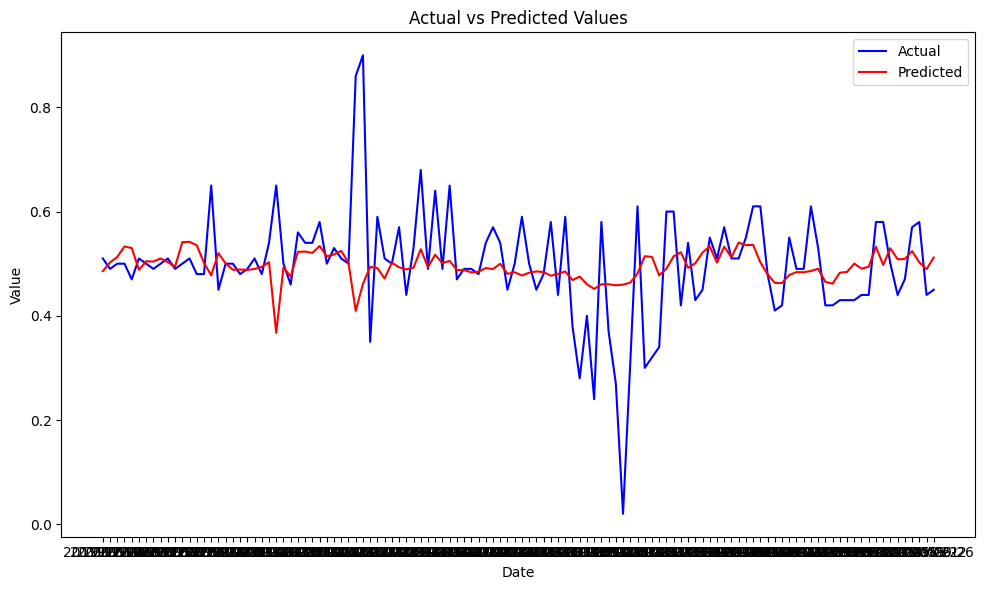

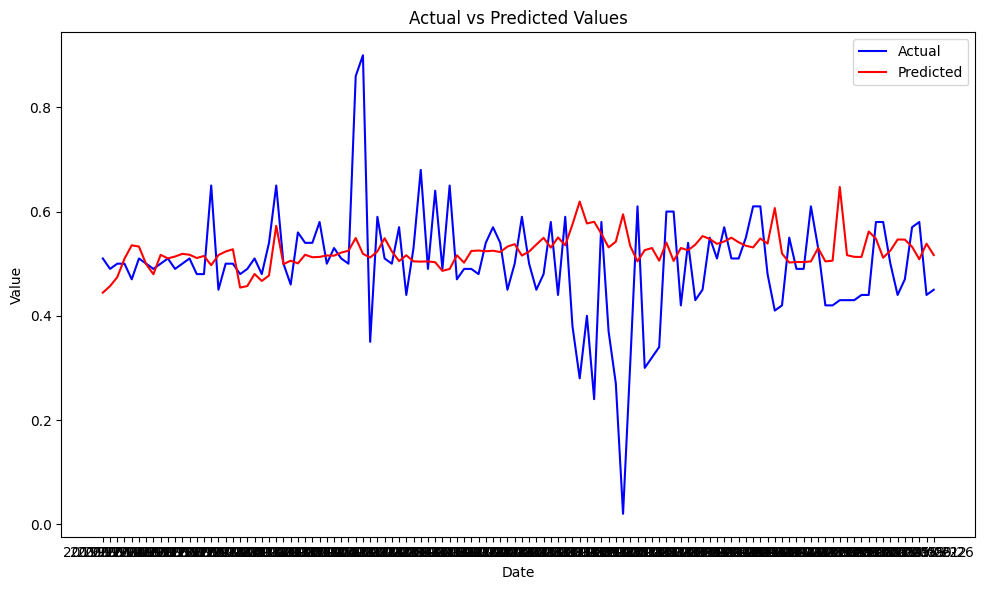

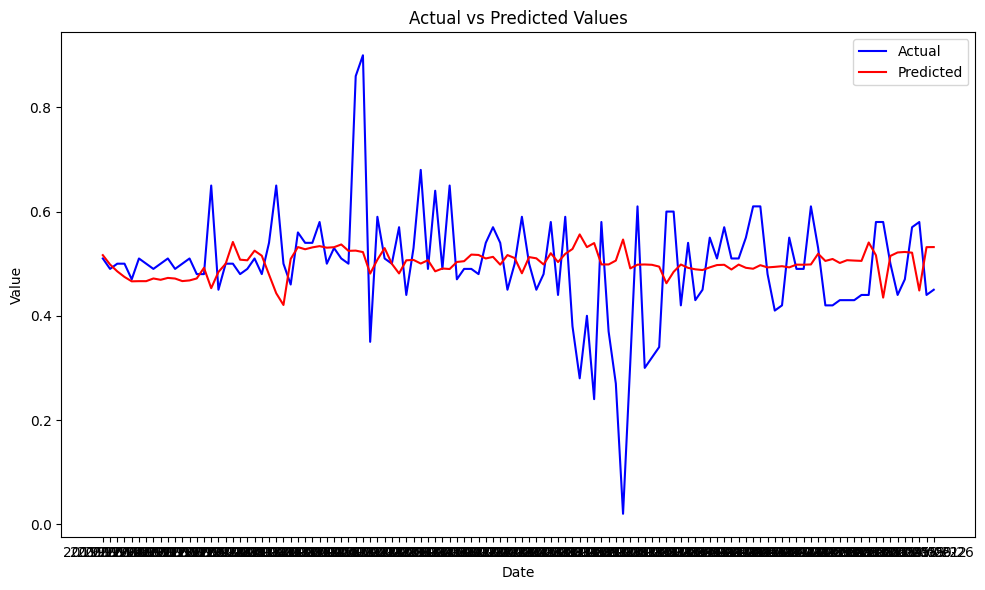

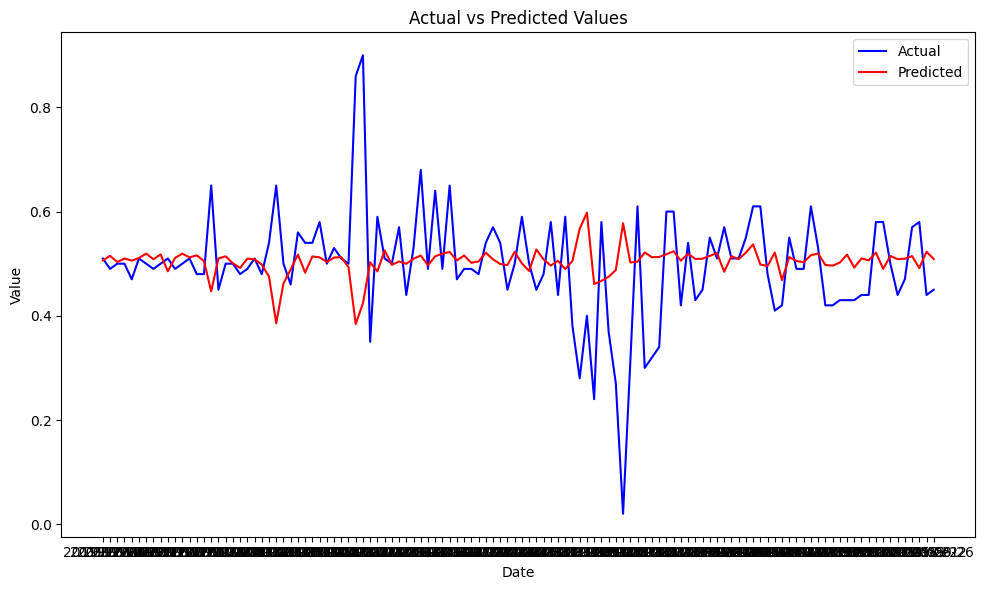

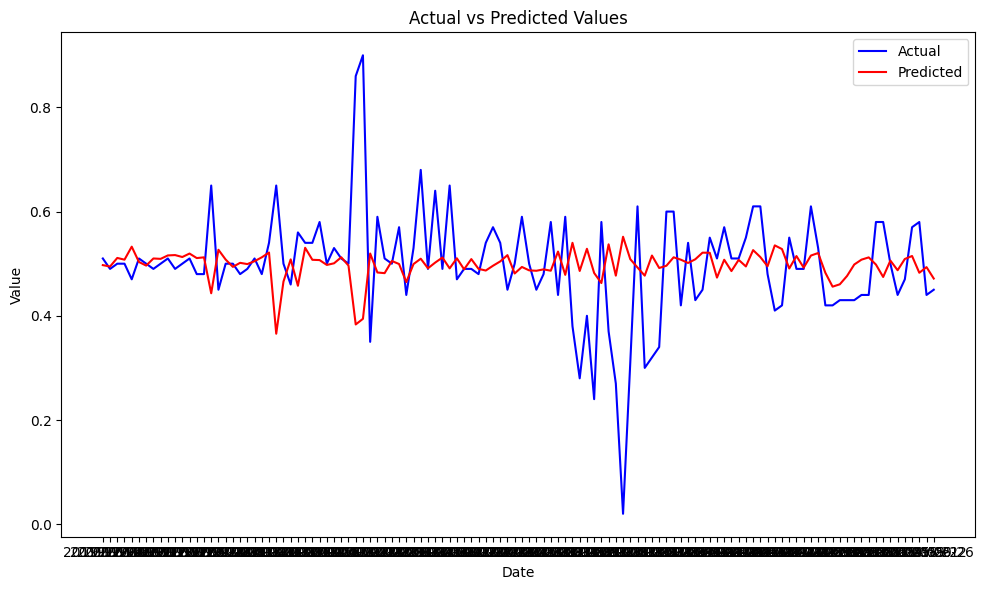

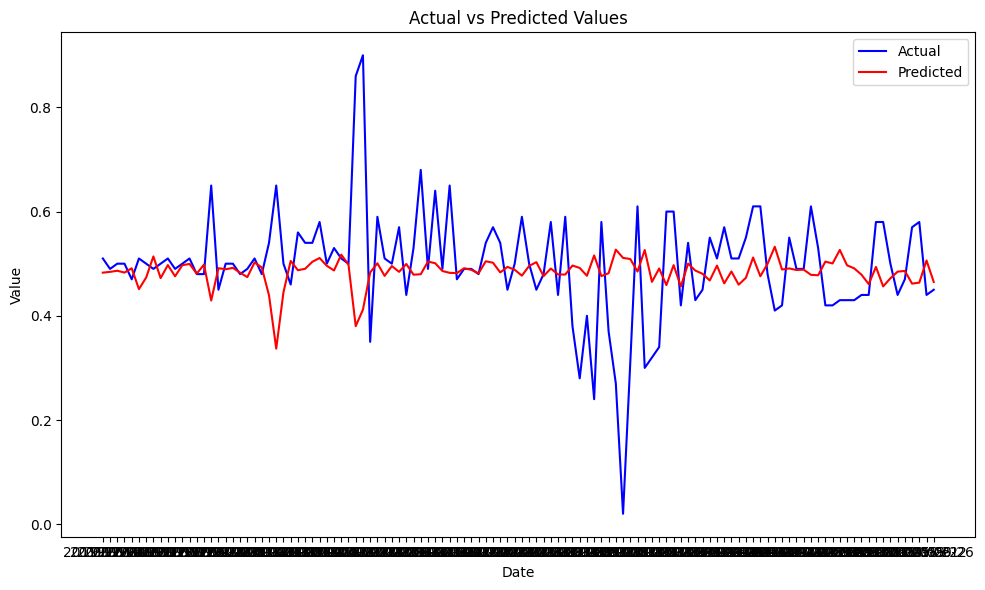

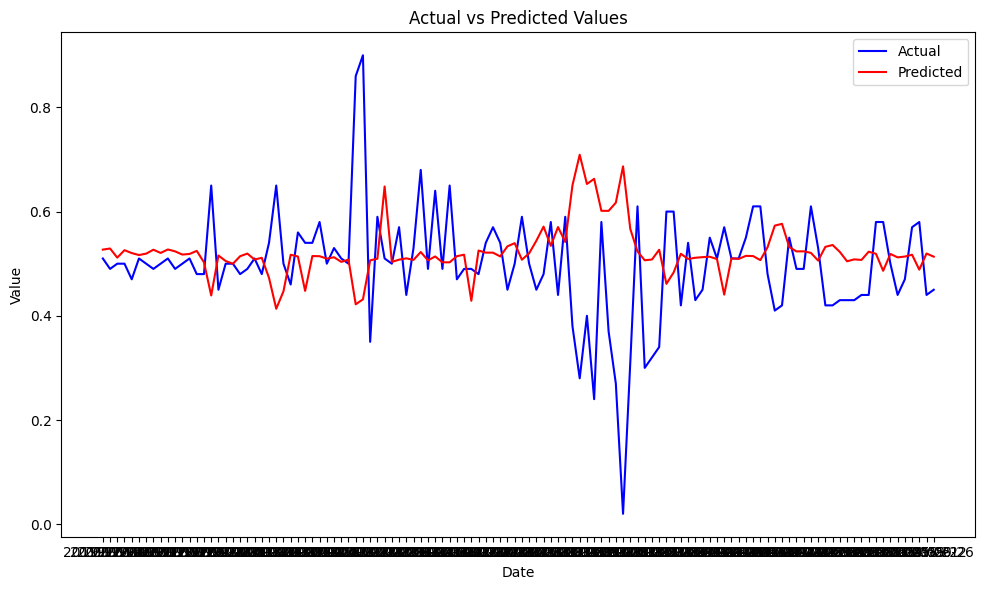

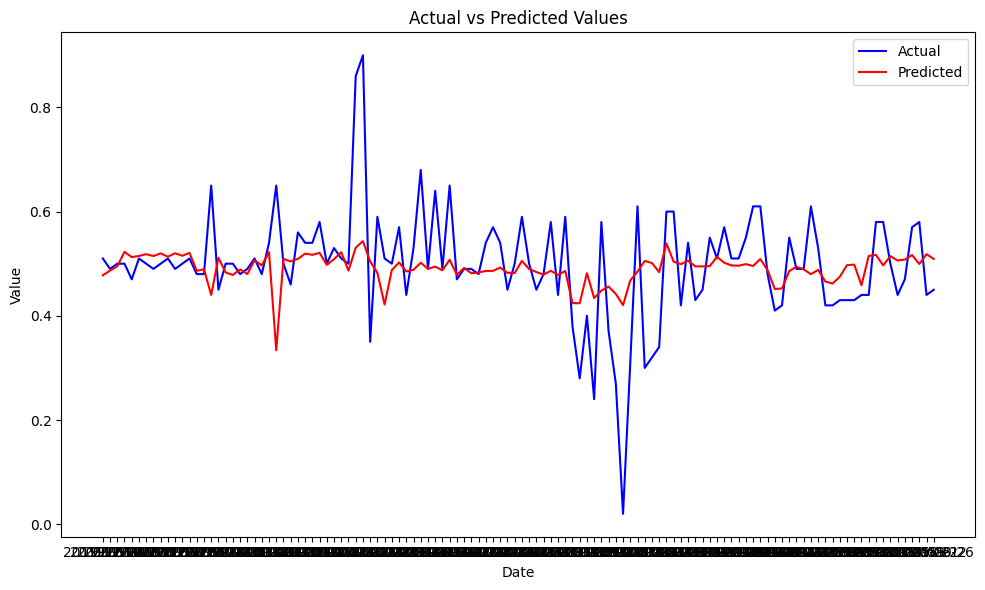

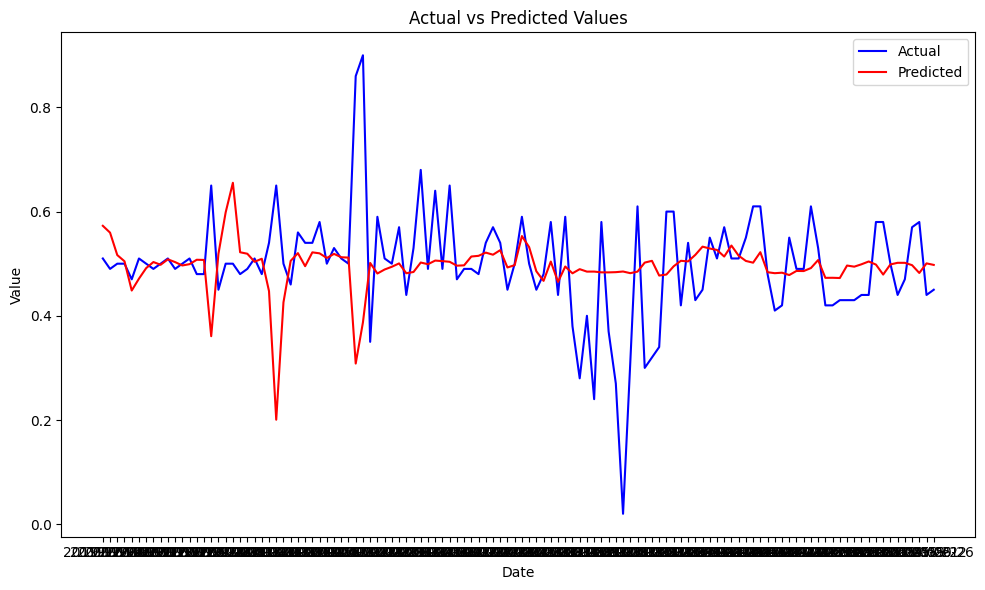

In [ ]:
results_df_alexNet_1 = pd.DataFrame({
    'Date': combined_df_test_alexNet_1['Date'],
    'Actual': y_test_alexNet_1 ,
    'Predicted': predictions_alexNet_1.flatten()
})

results_df_alexNet_2 = pd.DataFrame({
    'Date': combined_df_test_alexNet_2['Date'],
    'Actual': y_test_alexNet_2 ,
    'Predicted': predictions_alexNet_2.flatten()
})

results_df_alexNet_3 = pd.DataFrame({
    'Date': combined_df_test_alexNet_3['Date'],
    'Actual': y_test_alexNet_3 ,
    'Predicted': predictions_alexNet_3.flatten()
})

results_df_DenseNet_1 = pd.DataFrame({
    'Date': combined_df_test_DenseNet_1['Date'],
    'Actual': y_test_DenseNet_1 ,
    'Predicted': predictions_DenseNet_1.flatten()
})

results_df_DenseNet_2 = pd.DataFrame({
    'Date': combined_df_test_DenseNet_2['Date'],
    'Actual': y_test_DenseNet_2 ,
    'Predicted': predictions_DenseNet_2.flatten()
})

results_df_DenseNet_3 = pd.DataFrame({
    'Date': combined_df_test_DenseNet_3['Date'],
    'Actual': y_test_DenseNet_3 ,
    'Predicted': predictions_DenseNet_3.flatten()
})

results_df_EffencientNet_1 = pd.DataFrame({
    'Date': combined_df_test_EffencientNet_1['Date'],
    'Actual': y_test_EffencientNet_1 ,
    'Predicted': predictions_EffencientNet_1.flatten()
})

results_df_EffencientNet_2 = pd.DataFrame({
    'Date': combined_df_test_EffencientNet_2['Date'],
    'Actual': y_test_EffencientNet_2 ,
    'Predicted': predictions_EffencientNet_2.flatten()
})

results_df_EffencientNet_3 = pd.DataFrame({
    'Date': combined_df_test_EffencientNet_3['Date'],
    'Actual': y_test_EffencientNet_3 ,
    'Predicted': predictions_EffencientNet_3.flatten()
})

results_df_ResNet_1 = pd.DataFrame({
    'Date': combined_df_test_ResNet_1['Date'],
    'Actual': y_test_ResNet_1 ,
    'Predicted': predictions_ResNet_1.flatten()
})

results_df_ResNet_2 = pd.DataFrame({
    'Date': combined_df_test_ResNet_2['Date'],
    'Actual': y_test_ResNet_2 ,
    'Predicted': predictions_ResNet_2.flatten()
})

results_df_ResNet_3 = pd.DataFrame({
    'Date': combined_df_test_ResNet_3['Date'],
    'Actual': y_test_ResNet_3 ,
    'Predicted': predictions_ResNet_3.flatten()
})




mae_alexNet_1 = mean_absolute_error(y_test_alexNet_1, predictions_alexNet_1)
mae_alexNet_2 = mean_absolute_error(y_test_alexNet_2, predictions_alexNet_2)
mae_alexNet_3 = mean_absolute_error(y_test_alexNet_3, predictions_alexNet_3)

mae_DenseNet_1 = mean_absolute_error(y_test_DenseNet_1, predictions_DenseNet_1)
mae_DenseNet_2 = mean_absolute_error(y_test_DenseNet_2, predictions_DenseNet_2)
mae_DenseNet_3 = mean_absolute_error(y_test_DenseNet_3, predictions_DenseNet_3)

mae_EffencientNet_1 = mean_absolute_error(y_test_EffencientNet_1, predictions_EffencientNet_1)
mae_EffencientNet_2 = mean_absolute_error(y_test_EffencientNet_2, predictions_EffencientNet_2)
mae_EffencientNet_3 = mean_absolute_error(y_test_EffencientNet_3, predictions_EffencientNet_3)

mae_ResNet_1 = mean_absolute_error(y_test_ResNet_1, predictions_ResNet_1)
mae_ResNet_2 = mean_absolute_error(y_test_ResNet_2, predictions_ResNet_2)
mae_ResNet_3 = mean_absolute_error(y_test_ResNet_3, predictions_ResNet_3)

print(f'MAE for AlexNet Approach 1: {mae_alexNet_1}')
print(f'MAE for AlexNet Approach 2: {mae_alexNet_2}')
print(f'MAE for AlexNet Approach 3: {mae_alexNet_3}')
print(f'MAE for DenseNet Approach 1: {mae_DenseNet_1}')
print(f'MAE for DenseNet Approach 2: {mae_DenseNet_2}')
print(f'MAE for DenseNet Approach 3: {mae_DenseNet_3}')
print(f'MAE for EffecientNet Approach 1: {mae_EffencientNet_1}')
print(f'MAE for EffecientNet Approach 2: {mae_EffencientNet_2}')
print(f'MAE for EffecientNet Approach 3: {mae_EffencientNet_3}')
print(f'MAE for ResNet Approach 1: {mae_ResNet_1}')
print(f'MAE for ResNet Approach 2: {mae_ResNet_2}')
print(f'MAE for ResNet Approach 3: {mae_ResNet_3}')




plot(results_df_alexNet_1)
plot(results_df_alexNet_2)
plot(results_df_alexNet_3)
plot(results_df_DenseNet_1)
plot(results_df_DenseNet_2)
plot(results_df_DenseNet_3)
plot(results_df_EffencientNet_1)
plot(results_df_EffencientNet_2)
plot(results_df_EffencientNet_3)
plot(results_df_ResNet_1)
plot(results_df_ResNet_2)
plot(results_df_ResNet_3)
